In [5]:

#install google translator
!pip install google_trans_new
!pip install mysql-connector

     |████████████████████████████████| 11.9MB 5.9MB/s 
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247949 sha256=6fb4006962c77687a049b7bfc5a8caa23e6175cdb38eb17257eda1abcba38e5b
  Stored in directory: /root/.cache/pip/wheels/8c/83/a1/f8b6d4bb1bd6208bbde1608bbfa7557504bed9eaf2ecf8c175
Successfully built mysql-connector


In [6]:
import csv
import pandas as pd
import numpy as np
import warnings
import mysql.connector
#Import mysql connector for connecting to DB
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [7]:
#Storing the connection details of the DB in mydb
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database="Capstone1"
)

#Reading the Table : gender_age_train and getting all rows and store in dataframe df_gender_age
df_gender_age = pd.read_sql('SELECT * FROM gender_age_train', con=mydb)
df_gender_age.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [8]:
df_gender_age.head()   #top 5 rows

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [9]:
df_gender_age.tail() #bottom 5 rows

,device_id,gender,age,group
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38
74644,89181010588227347,M,25,M23-26


In [10]:
#unique groups
df_gender_age['group'].unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [11]:
#find min and max age for each group to check if there is no deviation in the data
df_gender_age.groupby(['group']).agg({'age': ['min', 'max']})


age    
       min max
group         
F23-    10  23
F24-26  24  26
F27-28  27  28
F29-32  29  32
F33-42  33  42
F43+    43  96
M22-     1  22
M23-26  23  26
M27-28  27  28
M29-31  29  31
M32-38  32  38
M39+    39  90

In [12]:
#find unique genders
df_gender_age['gender'].unique()

array(['M', 'F'], dtype=object)

In [13]:
#Check if gender and age groups are same
df_gender_age.groupby('group')['gender'].unique()

group
F23-      [F]
F24-26    [F]
F27-28    [F]
F29-32    [F]
F33-42    [F]
F43+      [F]
M22-      [M]
M23-26    [M]
M27-28    [M]
M29-31    [M]
M32-38    [M]
M39+      [M]
Name: gender, dtype: object

In [14]:
#find unique devices
df_gender_age['device_id'].nunique()

74645

In [ ]:
""""
from pandas_profiling import ProfileReport
profile = ProfileReport(df_gender_age, title='Telecom Profiling Report for Gender and Age', html={'style':{'full_width':True}})
"""

'"\nfrom pandas_profiling import ProfileReport\nprofile = ProfileReport(df_gender_age, title=\'Telecom Profiling Report for Gender and Age\', html={\'style\':{\'full_width\':True}})\n'

In [ ]:
#profile.to_file(output_file="PreProfiling_GenderAgeData.html") 

In [15]:
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database="Capstone1"
)
df_phone_brand = pd.read_sql('SELECT * FROM phone_brand_device_model ', con=mydb)
df_phone_brand.info()
#Reading the Table : phone_brand_device_model and getting all rows and store in dataframe df_phone_brand

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [16]:
df_phone_brand.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [17]:
df_phone_brand.tail()

,device_id,phone_brand,device_model
87721,-4961458925928574032,华为,荣耀畅玩4X
87722,-8819817317449262375,华为,荣耀6
87723,-3358291377416935026,华为,荣耀畅玩4
87724,3282788959750981633,小米,MI 2
87725,2491639413207286271,酷比,M1


In [18]:
import string
#Check if string is english or non english
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

#df_Phone_brand_Eng =
from google_trans_new import google_translator  
translator = google_translator() 
#Find english translation of phone_brand
df_Phone_1=pd.DataFrame(df_phone_brand['phone_brand'].unique())
df_Phone_1.rename( columns={0 :'phone_brand'}, inplace=True )
df_Phone_1['phone_brand_E']=df_Phone_1['phone_brand'].apply(lambda x: x if isEnglish(x) else translator.translate(x, lang_src="zh-TW", lang_tgt="en"))
print ("Phone brand updated...")
#Find english translation of device model
df_Phone_2=pd.DataFrame(df_phone_brand['device_model'].unique())
df_Phone_2.rename( columns={0 :'device_model'}, inplace=True )

df_Phone_2['device_model_E']=df_Phone_2['device_model'].apply(lambda x: x if isEnglish(x) else translator.translate(x, lang_src="zh-TW", lang_tgt="en"))
print ("Device model updated...")

Phone brand updated...
Device model updated...


In [19]:
df_ph = pd.merge(df_phone_brand,df_Phone_1, how="inner", on="phone_brand")
df_ph

,device_id,phone_brand,device_model,phone_brand_E
0,1877775838486905855,vivo,Y13,vivo
1,-8705713195059105949,vivo,X6 L,vivo
2,7284092388756598809,vivo,Y35,vivo
3,-298209719519394007,vivo,Xperia SL,vivo
4,5191524460861112478,vivo,Y17T,vivo
...,...,...,...,...
87721,-8463760279549544397,欧乐迪,Z1988,Oeri
87722,-1827265414361726037,欧乐迪,Z1988,Oeri
87723,2199613157955485294,欧乐迪,Z1988,Oeri
87724,-5387173829047621361,PPTV,King 7,PPTV


In [20]:
df_phone_brand = pd.merge(df_ph,df_Phone_2, how="inner", on="device_model")
df_phone_brand.drop(['phone_brand','device_model'], axis = 1, inplace=True)
df_phone_brand.rename(columns={'phone_brand_E': 'phone_brand', 'device_model_E': 'device_model'}, inplace=True)
df_phone_brand

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-2885977155535060505,vivo,Y13
2,-1805452415296473122,vivo,Y13
3,2550692186115864020,vivo,Y13
4,1516978092456918166,vivo,Y13
...,...,...,...
87721,-8463760279549544397,Oeri,Z1988
87722,-1827265414361726037,Oeri,Z1988
87723,2199613157955485294,Oeri,Z1988
87724,-5387173829047621361,PPTV,King 7


In [21]:
df_phone_brand.groupby('phone_brand')['device_model'].unique()

phone_brand
ASUS            [ZenFone Max, ZenFone 2, ZenFone 5, ME371MG, F...
Ai Pike                                           [IPH8, iPh-800]
Aiyini                                               [U3, U2, i1]
Amagatarai      [E8, K1, T87+, Touch 2C, Touch 2, L920, V8, T9...
Association     [A880, Star 1 , Q507T, V5 Max, U960E, Grand X,...
                                      ...                        
black rice                                               [A1, A5]
hammer                                [T1, Nut mobile phone , T2]
pioneer                                              [K68w, K88L]
vivo            [Y13, X6 L, Y35, Xperia SL, Y17T, X710L, X5M, ...
waveguide       [LT01, T9108, L9, T9508, LT02, T9600, L108, L1...
Name: device_model, Length: 114, dtype: object

In [22]:
#find unique devices
df_phone_brand['device_id'].nunique()

87726

In [ ]:
"""
from pandas_profiling import ProfileReport
profile = ProfileReport(df_phone_brand, title='Telecom Profiling Report for Phone and Brand', html={'style':{'full_width':True}})
profile.to_file(output_file="PreProfiling_PhoneBrand.html") 
"""

'\nfrom pandas_profiling import ProfileReport\nprofile = ProfileReport(df_phone_brand, title=\'Telecom Profiling Report for Phone and Brand\', html={\'style\':{\'full_width\':True}})\nprofile.to_file(output_file="PreProfiling_PhoneBrand.html") \n'

In [23]:
#Merging the two DataFrames into one on Device_id
df_gender_phone_brand_merge = pd.merge(df_phone_brand,df_gender_age, how="outer", on="device_id")
df_gender_phone_brand_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87754 entries, 0 to 87753
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     87754 non-null  int64  
 1   phone_brand   87726 non-null  object 
 2   device_model  87726 non-null  object 
 3   gender        74645 non-null  object 
 4   age           74645 non-null  float64
 5   group         74645 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ MB


In [24]:
df_gender_phone_brand_merge.head()

,device_id,phone_brand,device_model,gender,age,group
0,1877775838486905855,vivo,Y13,NaN,NaN,NaN
1,-2885977155535060505,vivo,Y13,NaN,NaN,NaN
2,-1805452415296473122,vivo,Y13,NaN,NaN,NaN
3,2550692186115864020,vivo,Y13,NaN,NaN,NaN
4,1516978092456918166,vivo,Y13,NaN,NaN,NaN


In [25]:
df_gender_phone_brand_merge.tail()

,device_id,phone_brand,device_model,gender,age,group
87749,-4694231482794047022,NaN,NaN,M,26.0,M23-26
87750,-2827401485760766914,NaN,NaN,M,26.0,M23-26
87751,-4274187834430768408,NaN,NaN,M,22.0,M22-
87752,-7314067039317617491,NaN,NaN,F,27.0,F27-28
87753,8778900262406705317,NaN,NaN,M,27.0,M27-28


In [26]:
df_gender_phone_brand_merge['device_id']=df_gender_phone_brand_merge['device_id'].astype('str')

In [27]:
df_gender_phone_brand_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87754 entries, 0 to 87753
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     87754 non-null  object 
 1   phone_brand   87726 non-null  object 
 2   device_model  87726 non-null  object 
 3   gender        74645 non-null  object 
 4   age           74645 non-null  float64
 5   group         74645 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.7+ MB


In [ ]:
"""
from pandas_profiling import ProfileReport
profile = ProfileReport(df_gender_phone_brand_merge, title='Telecom Profiling Report for PhoneBrand_GenderAge', html={'style':{'full_width':True}})
profile.to_file(output_file="PreProfiling_PhoneBrand_GenderAge.html") 
"""

'\nfrom pandas_profiling import ProfileReport\nprofile = ProfileReport(df_gender_phone_brand_merge, title=\'Telecom Profiling Report for PhoneBrand_GenderAge\', html={\'style\':{\'full_width\':True}})\nprofile.to_file(output_file="PreProfiling_PhoneBrand_GenderAge.html") \n'

In [32]:

!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Verfication and validate to connect to your google drive


In [29]:
"""
link = 'https://drive.google.com/file/d/1Ir3rW0YTKmk7MSjVjCU_UGMQevhe1v9W/view?usp=sharing'
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('events_data.csv')  
"""

'\nlink = \'https://drive.google.com/file/d/1Ir3rW0YTKmk7MSjVjCU_UGMQevhe1v9W/view?usp=sharing\'\n  \n# to get the id part of the file\nid = link.split("/")[-2]\n  \ndownloaded = drive.CreateFile({\'id\':id}) \ndownloaded.GetContentFile(\'events_data.csv\')  \n'

In [33]:

link = 'https://drive.google.com/file/d/1Ir3rW0YTKmk7MSjVjCU_UGMQevhe1v9W/view?usp=sharing'
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('events_data.csv')  

In [34]:
df_events= pd.read_csv('.//events_data.csv',parse_dates=['timestamp'],dtype={"device_id":str,"city":str,"state":str})
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   event_id   int64         
 1   device_id  object        
 2   timestamp  datetime64[ns]
 3   longitude  float64       
 4   latitude   float64       
 5   city       object        
 6   state      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 173.7+ MB


In [35]:
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4734221357723754978,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3264499652692492784,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5731369272434022440,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,338888002570799963,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [36]:
df_events.tail()

,event_id,device_id,timestamp,longitude,latitude,city,state
3252945,2687452,-1937027962234299179,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra
3252946,1051580,3345850694879477383,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra
3252947,1316227,-6406040271586685138,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi
3252948,381262,-2920741109167081271,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh
3252949,522592,3212750469059608826,2016-05-07 17:34:18,77.308533,9.779918,Kambam,TamilNadu


In [37]:
#Find the cities with Null state.
df_MH_events_data= df_events[df_events['state'].isnull()]
df_MH_events_data['city'].unique()


array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

In [38]:
#find mapping of city and state
df_citystate = df_events.dropna(subset=['state']).drop_duplicates('city').set_index('city')['state']
df_citystate.head(10)

city
Delhi                    Delhi
Calcutta            WestBengal
Chennai              TamilNadu
Bokaro               Jharkhand
Visakhapatnam    AndhraPradesh
Wanparti         AndhraPradesh
Mumbai             Maharashtra
Pune               Maharashtra
Gandhidham             Gujarat
Thalassery              Kerala
Name: state, dtype: object

In [39]:
#update state where it is Nan
df_events['state'] = df_events['state'].fillna(df_events['city'].map(df_citystate))
                                               
#find if state is still Nan                                          
df_events[df_events['state'].isnull()]


,event_id,device_id,timestamp,longitude,latitude,city,state


In [40]:
#Filter out Maharashtra state data only
df_MH_events_data= df_events[df_events['state']=='Maharashtra']
df_MH_events_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 677168 entries, 9 to 3252946
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event_id   677168 non-null  int64         
 1   device_id  677096 non-null  object        
 2   timestamp  677168 non-null  datetime64[ns]
 3   longitude  677105 non-null  float64       
 4   latitude   677105 non-null  float64       
 5   city       677168 non-null  object        
 6   state      677168 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 41.3+ MB


In [41]:
df_MH_events_data[df_MH_events_data['device_id'].isnull()]

,event_id,device_id,timestamp,longitude,latitude,city,state
45052,1129522,NaN,2016-05-02 22:05:43,73.862756,18.628057,Pune,Maharashtra
59590,690029,NaN,2016-05-05 20:30:03,73.860165,18.566925,Pune,Maharashtra
106494,1722320,NaN,2016-05-04 16:57:25,73.926499,18.614812,Pune,Maharashtra
119854,1753386,NaN,2016-05-07 17:48:34,73.926499,18.614812,Pune,Maharashtra
135788,2860746,NaN,2016-05-03 18:32:17,73.862756,18.628057,Pune,Maharashtra
...,...,...,...,...,...,...,...
3016652,2802507,NaN,2016-05-03 11:43:25,73.860165,18.566925,Pune,Maharashtra
3026865,1660304,NaN,2016-05-06 22:15:44,73.862756,18.628057,Pune,Maharashtra
3067777,317114,NaN,2016-05-03 19:04:46,73.862756,18.628057,Pune,Maharashtra
3106136,455292,NaN,2016-05-01 16:15:02,73.860165,18.566925,Pune,Maharashtra


In [42]:
#Concatenate latitude and longitude
df_MH_events_data['lat_long'] = [', '.join(str(x) for x in y) for y in map(tuple, df_MH_events_data[['latitude', 'longitude']].values)]


In [43]:
#create mapping between latitude and longitude column with device_id
df_ll = df_MH_events_data.dropna(subset=['device_id']).drop_duplicates('lat_long').set_index('lat_long')['device_id'] 



In [45]:
#update device_id where it is Nan using latitude and longitude columns

df_MH_events_data['device_id'] = df_MH_events_data['device_id'].fillna(df_MH_events_data['lat_long'].map(df_ll))



In [46]:
#test random data for events
df_MH_events_data[df_MH_events_data['event_id']==1129522]

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long
45052,1129522,9027085705222633039,2016-05-02 22:05:43,73.862756,18.628057,Pune,Maharashtra,"18.628057, 73.862756"


In [47]:
#check longitude and latitude for the device
df_events[df_events['device_id'] == '9027085705222633039'][['device_id','latitude','longitude']].drop_duplicates()

,device_id,latitude,longitude
3031,9027085705222633039,18.628057,73.862756


In [48]:
df_MH_events_data[df_MH_events_data['device_id'].isnull()]

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long


In [49]:
df_MH_events_data.head(10)

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long
9,720049,4928555839839669963,2016-05-06 19:00:52,72.844795,18.974929,Mumbai,Maharashtra,"18.974929, 72.84479499999998"
11,13998,3978025911571213813,2016-05-06 13:12:42,73.875196,18.615791,Pune,Maharashtra,"18.615791, 73.875196"
20,1378252,-4384473680693400537,2016-05-05 04:20:02,73.914179,18.619081,Pune,Maharashtra,"18.619081, 73.914179"
21,185325,-7369689650429994275,2016-05-02 20:07:07,72.874552,19.014537,Mumbai,Maharashtra,"19.014537, 72.87455200000002"
22,1861432,3965810796882254829,2016-05-02 20:49:13,73.938826,18.582846,Pune,Maharashtra,"18.582846, 73.938826"
25,2923724,5178607734587385157,2016-05-05 21:14:28,72.859311,18.990110,Mumbai,Maharashtra,"18.99011, 72.85931099999998"
33,1851307,4918127076064191573,2016-05-03 11:07:32,77.630324,19.990620,Pusad,Maharashtra,"19.99062, 77.63032399999999"
34,1695686,-1844275662696897739,2016-05-05 19:06:46,77.354427,21.255712,Anjangaon,Maharashtra,"21.255712, 77.354427"
41,1171529,3653642617746436443,2016-05-03 07:57:10,72.838406,19.014749,Mumbai,Maharashtra,"19.014749, 72.83840599999998"
42,2523586,-7818282052440525320,2016-05-05 15:33:49,73.929706,18.623336,Pune,Maharashtra,"18.623336, 73.92970600000002"


In [50]:
df_MH_events_data.tail(10)

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long
3252894,3054455,-7230956641802738875,2016-05-05 06:43:11,73.925000,18.586615,Pune,Maharashtra,"18.586615, 73.925"
3252897,2568717,8743727650643668659,2016-05-06 23:13:26,72.832084,19.054932,Mumbai,Maharashtra,"19.054932, 72.832084"
3252900,2870842,2715721459350076194,2016-05-01 06:29:10,72.844878,19.043853,Mumbai,Maharashtra,"19.043853, 72.84487800000002"
3252927,1262166,-1768479969085042127,2016-05-07 19:02:06,72.985984,19.284991,Thana,Maharashtra,"19.284991, 72.985984"
3252928,1514111,-1399631555680725969,2016-05-05 16:01:39,72.861041,19.033017,Mumbai,Maharashtra,"19.033017, 72.861041"
3252938,73002,-5758559653892125230,2016-05-03 06:30:02,73.858068,18.574054,Pune,Maharashtra,"18.574054, 73.858068"
3252941,3046303,5212597454400226406,2016-05-04 07:50:48,73.897710,18.565680,Pune,Maharashtra,"18.56568, 73.89771"
3252942,3244031,2320542621284956663,2016-05-07 18:36:01,73.886764,18.585058,Pune,Maharashtra,"18.585058, 73.886764"
3252945,2687452,-1937027962234299179,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra,"18.544124, 73.89159699999998"
3252946,1051580,3345850694879477383,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra,"19.018432, 72.83725799999998"


In [51]:
#Find Null latitude and longitude
df_MH_events_data[(df_MH_events_data['latitude'].isnull()) | (df_MH_events_data['longitude'].isnull())]

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long
20586,3074782,-7364840628879980812,2016-05-04 19:39:28,NaN,NaN,Pune,Maharashtra,"nan, nan"
83130,1237362,-7364840628879980812,2016-05-06 01:01:21,NaN,NaN,Pune,Maharashtra,"nan, nan"
105679,2400756,-7364840628879980812,2016-05-06 14:41:37,NaN,NaN,Pune,Maharashtra,"nan, nan"
123196,2356803,-7364840628879980812,2016-05-05 22:09:45,NaN,NaN,Pune,Maharashtra,"nan, nan"
221786,367484,-7364840628879980812,2016-05-04 07:53:57,NaN,NaN,Pune,Maharashtra,"nan, nan"
...,...,...,...,...,...,...,...,...
2993294,2074411,7018600380123444976,2016-05-04 07:39:01,NaN,NaN,Pune,Maharashtra,"nan, nan"
2994050,1915577,7018600380123444976,2016-05-03 21:44:59,NaN,NaN,Pune,Maharashtra,"nan, nan"
3151816,2943906,5115185276392512955,2016-05-03 13:41:38,NaN,NaN,Pune,Maharashtra,"nan, nan"
3219808,1335798,-7364840628879980812,2016-05-05 11:47:06,NaN,NaN,Pune,Maharashtra,"nan, nan"


In [52]:
#Find Nan longitude and latitude
device_ids = list(df_MH_events_data[(df_MH_events_data['latitude'].isnull()) | (df_MH_events_data['longitude'].isnull())]['device_id'].unique())
device_ids

['-7364840628879980812', '7018600380123444976', '5115185276392512955']

In [53]:
#Check any of these values
df_MH_events_data[df_MH_events_data['device_id'] == '-7364840628879980812'][['device_id','latitude','longitude']].drop_duplicates()

,device_id,latitude,longitude
1678,-7364840628879980812,18.54074,73.931944
20586,-7364840628879980812,NaN,NaN


In [54]:
#Update the data with the mode value of latitude and longitude
for deviceId in device_ids:
    lat_mode = float(df_MH_events_data[df_MH_events_data['device_id'] == deviceId]['latitude'].mode())
    long_mode = float(df_MH_events_data[df_MH_events_data['device_id'] == deviceId]['longitude'].mode())
    df_MH_events_data.loc[df_MH_events_data['device_id'] == deviceId, 'latitude'] = lat_mode
    df_MH_events_data.loc[df_MH_events_data['device_id'] == deviceId, 'longitude'] = long_mode

In [55]:
#Verify data after changes are implemented
df_MH_events_data[df_MH_events_data['device_id'] == '-7364840628879980812'][['device_id','latitude','longitude']].drop_duplicates()

,device_id,latitude,longitude
1678,-7364840628879980812,18.54074,73.931944


In [56]:
#drop columns state and lat_long
df_MH_events_data.drop(['state','lat_long'], axis = 1, inplace=True)

In [57]:
#Check information. No Null exists.
df_MH_events_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677168 entries, 9 to 3252946
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event_id   677168 non-null  int64         
 1   device_id  677168 non-null  object        
 2   timestamp  677168 non-null  datetime64[ns]
 3   longitude  677168 non-null  float64       
 4   latitude   677168 non-null  float64       
 5   city       677168 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 36.2+ MB


In [58]:
# find and remove duplicate
print("No. of records in dataset are : ", len(df_MH_events_data))
print("No. of duplicate records",len(df_MH_events_data[df_MH_events_data.duplicated()]))


No. of records in dataset are :  677168
No. of duplicate records 0


In [59]:
df_events_gender_phone_merge = pd.merge(df_MH_events_data ,df_gender_phone_brand_merge, how="left", on="device_id")
df_events_gender_phone_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677168 entries, 0 to 677167
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      677168 non-null  int64         
 1   device_id     677168 non-null  object        
 2   timestamp     677168 non-null  datetime64[ns]
 3   longitude     677168 non-null  float64       
 4   latitude      677168 non-null  float64       
 5   city          677168 non-null  object        
 6   phone_brand   677168 non-null  object        
 7   device_model  677168 non-null  object        
 8   gender        677168 non-null  object        
 9   age           677168 non-null  float64       
 10  group         677168 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 62.0+ MB


In [60]:
df_events_gender_phone_merge.head()

,event_id,device_id,timestamp,longitude,latitude,city,phone_brand,device_model,gender,age,group
0,720049,4928555839839669963,2016-05-06 19:00:52,72.844795,18.974929,Mumbai,vivo,X5L,M,33.0,M32-38
1,13998,3978025911571213813,2016-05-06 13:12:42,73.875196,18.615791,Pune,Samsung,Galaxy S3,M,19.0,M22-
2,1378252,-4384473680693400537,2016-05-05 04:20:02,73.914179,18.619081,Pune,Huawei,Glory 3C,M,25.0,M23-26
3,185325,-7369689650429994275,2016-05-02 20:07:07,72.874552,19.014537,Mumbai,Huawei,Glory play 4C,M,23.0,M23-26
4,1861432,3965810796882254829,2016-05-02 20:49:13,73.938826,18.582846,Pune,vivo,Y18L,F,19.0,F23-


In [61]:
df_events_gender_phone_merge.tail()

,event_id,device_id,timestamp,longitude,latitude,city,phone_brand,device_model,gender,age,group
677163,73002,-5758559653892125230,2016-05-03 06:30:02,73.858068,18.574054,Pune,Plus,One,M,27.0,M27-28
677164,3046303,5212597454400226406,2016-05-04 07:50:48,73.897710,18.565680,Pune,Millet,MI 2S,F,44.0,F43+
677165,3244031,2320542621284956663,2016-05-07 18:36:01,73.886764,18.585058,Pune,Millet,MI 3,M,24.0,M23-26
677166,2687452,-1937027962234299179,2016-05-07 23:33:14,73.891597,18.544124,Pune,Millet,Red rice 1s,F,38.0,F33-42
677167,1051580,3345850694879477383,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Plus,One,M,22.0,M22-


In [62]:
#sort data on event id
df_events_gender_phone_merge.sort_values(by=['event_id'], inplace=True)

In [63]:
df_events_gender_phone_merge.to_csv("InsaidTelecomDataset.csv")

In [ ]:
#clear all dataframe to release memory
"""
del df_gender_age
del df_phone_brand
del df_gender_phone_brand_merge
del df_events
del df_MH_events_data
del df_citystate
del df_MH_events_data_1
del df_ll
del df_events_gender_phone_merge
"""


In [64]:
#Read the csv file in df_Telecom 
cols = list(pd.read_csv("InsaidTelecomDataset.csv", nrows =1))
df_Telecom = pd.read_csv('InsaidTelecomDataset.csv',parse_dates=['timestamp'],usecols =[i for i in cols if i != 'Unnamed: 0'],dtype={"device_id":str,"city":str})
df_Telecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677168 entries, 0 to 677167
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      677168 non-null  int64         
 1   device_id     677168 non-null  object        
 2   timestamp     677168 non-null  datetime64[ns]
 3   longitude     677168 non-null  float64       
 4   latitude      677168 non-null  float64       
 5   city          677168 non-null  object        
 6   phone_brand   677168 non-null  object        
 7   device_model  677168 non-null  object        
 8   gender        677168 non-null  object        
 9   age           677168 non-null  float64       
 10  group         677168 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 56.8+ MB


In [65]:
df_Telecom.head(10)

,event_id,device_id,timestamp,longitude,latitude,city,phone_brand,device_model,gender,age,group
0,2246,4048381153450636558,2016-05-03 03:13:37,73.859134,18.575338,Pune,vivo,Y23L,F,43.0,F43+
1,2252,-8133280833236395724,2016-05-03 03:09:52,73.888547,18.550411,Pune,vivo,X5SL,M,33.0,M32-38
2,2254,296476138614449616,2016-05-03 03:12:00,73.888967,18.594675,Pune,Huawei,Glory play 4,M,22.0,M22-
3,2256,760503316778223329,2016-05-03 03:55:01,73.892659,18.602857,Pune,Millet,Red rice Note,F,62.0,F43+
4,2258,-1490175732022808693,2016-05-03 03:55:00,73.863110,18.602342,Pune,Huawei,Glory 3C,F,21.0,F23-
5,2261,2445993792412785307,2016-05-03 03:27:51,73.883063,18.604494,Pune,Samsung,Galaxy Note 3,F,45.0,F43+
6,2262,6276992525243228140,2016-05-03 03:00:57,73.884201,18.564278,Pune,Samsung,S7898,F,33.0,F33-42
7,2264,6071856027694706824,2016-05-03 03:21:46,73.916330,18.602033,Pune,Huawei,C8818,M,41.0,M39+
8,2267,-387900944632885382,2016-05-03 03:09:59,73.856139,18.545157,Pune,Millet,Red rice 2a,M,28.0,M27-28
9,2269,2765275027075841647,2016-05-03 03:17:13,73.938735,18.612476,Pune,Huawei,Ascend G7,M,37.0,M32-38


In [66]:
df_Telecom.tail(10)

,event_id,device_id,timestamp,longitude,latitude,city,phone_brand,device_model,gender,age,group
677158,3252891,1834389478016206260,2016-05-07 22:56:53,72.836308,19.044194,Mumbai,Millet,MI 4,F,22.0,F23-
677159,3252897,-4153913356815067763,2016-05-07 23:09:23,73.893425,18.572641,Pune,vivo,Y11,M,46.0,M39+
677160,3252902,7565959697267570843,2016-05-07 23:06:27,72.866879,19.024424,Mumbai,Samsung,Galaxy A8,M,24.0,M23-26
677161,3252909,1592938327888672569,2016-05-07 23:35:27,73.889480,18.564418,Pune,Cool,8720L,F,24.0,F24-26
677162,3252918,4495750910128395273,2016-05-07 22:56:02,72.893693,19.002173,Mumbai,Charming,MX2,F,26.0,F24-26
677163,3252928,-7811917364935931539,2016-05-07 23:45:33,76.574225,20.734164,Khamgaon,Association,U795+,M,23.0,M23-26
677164,3252934,-8456572573025681677,2016-05-07 23:06:49,72.968435,19.361845,Navghar,Millet,Red rice Note2,F,27.0,F27-28
677165,3252935,3650938144459632894,2016-05-07 23:24:01,72.866115,19.023890,Mumbai,Huawei,Mate 7 Youth Edition,M,69.0,M39+
677166,3252945,-7468344787041842956,2016-05-07 23:56:08,73.895079,18.573559,Pune,Huawei,C8813,M,37.0,M32-38
677167,3252948,7111660304904287709,2016-05-07 23:35:33,72.837890,19.031563,Mumbai,OPPO,R831T,M,36.0,M32-38


In [ ]:
"""
from pandas_profiling import ProfileReport
profile = ProfileReport(df_Telecom, title='Telecom Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="Insaid_Telecom_Profiling.pdf")
"""

In [67]:
df_Telecom.sample(10)

,event_id,device_id,timestamp,longitude,latitude,city,phone_brand,device_model,gender,age,group
401680,1925800,2078454538985683888,2016-05-03 08:43:50,75.816920,19.032856,Bid,Millet,Red rice Note,M,22.0,M22-
522278,2506209,-3145871569166435772,2016-05-01 06:39:22,73.860683,18.623265,Pune,Samsung,Galaxy S6,M,27.0,M27-28
487105,2336928,-2762255737169245464,2016-05-06 14:03:20,72.876068,18.993084,Mumbai,OPPO,A31,M,33.0,M32-38
187283,893956,-330182363271707178,2016-05-01 07:18:36,73.911026,18.614355,Pune,Millet,MI 3,M,21.0,M22-
556401,2671123,8594862512851080966,2016-05-06 18:53:29,74.837152,19.191073,Ahmadnagar,Millet,Red rice Note,M,27.0,M27-28
295165,1413024,4529298113351424933,2016-05-06 05:09:43,72.905881,19.008315,Mumbai,Huawei,Glory 6 Plus,M,25.0,M23-26
671886,3226600,7716187835123442279,2016-05-02 08:45:20,72.914141,19.020402,Mumbai,OPPO,R6007,M,29.0,M29-31
10723,48696,-2631872797399231341,2016-05-04 15:23:23,73.850413,18.587229,Pune,Millet,Red rice 2a,F,26.0,F24-26
575641,2764677,4960816594167100623,2016-05-04 22:43:53,73.888572,18.557196,Pune,Millet,MI 3,F,22.0,F23-
449984,2158518,-89275683011866947,2016-05-02 16:15:49,73.867986,18.562020,Pune,Millet,Red rice Note2,M,36.0,M32-38


In [68]:
#Get unique records from the dataset
df_State=pd.DataFrame(df_Telecom[['device_id','longitude','latitude','city','phone_brand','device_model','gender','age','group']].drop_duplicates())


In [69]:
#!pip install folium

import folium as folium

In [70]:
#sort data based on longitude
df_State.sort_values(by=['longitude'], inplace=True)
df_State.head(10)

,device_id,longitude,latitude,city,phone_brand,device_model,gender,age,group
66521,-3300282771940051439,12.567000,41.871900,Pune,Millet,Red rice Note,F,35.0,F33-42
63951,436980604655174361,55.270800,25.204800,Pune,Huawei,X1 7.0,M,28.0,M27-28
76489,4995976326034236311,69.207500,34.555300,Pune,Charming,MX2,M,32.0,M32-38
15007,-1741385130910718960,72.741634,20.042520,Dahanu,Samsung,Galaxy Note 2,M,29.0,M29-31
648513,604601419601042567,72.741797,20.000395,Dahanu,Samsung,Galaxy Note 4,F,32.0,F29-32
89275,26211278623319670,72.742448,20.038886,Dahanu,Millet,MI One Plus,M,22.0,M22-
63927,5579566039534587731,72.742800,20.052215,Dahanu,Charming,Charm blue metal,F,38.0,F33-42
27428,7578986340638826143,72.745702,19.990415,Dahanu,Huawei,P8 Lite,M,24.0,M23-26
3473,727364287871714235,72.750691,20.061953,Dahanu,Samsung,Galaxy Note 2,F,29.0,F29-32
60466,-4572416228963973233,72.751211,20.066039,Dahanu,Cool,8702,F,19.0,F23-


In [71]:
df_Res=pd.DataFrame(df_State.groupby(['device_id'])['device_id'].agg({'count'}))
df_Res=df_Res[df_Res['count']>1]
df_Res.reset_index(inplace=True)
df_Res

,device_id,count
0,-3300282771940051439,2
1,436980604655174361,2
2,4995976326034236311,2


In [72]:
#Find incorrect longitude and latitude
device_ids = df_Res['device_id']
for deviceId in device_ids:
    print(df_State[df_State['device_id']==deviceId][['device_id','longitude','latitude','city']].to_string(header=False))
 

66521  -3300282771940051439  12.567000  41.871900  Pune
1313   -3300282771940051439  73.900428  18.621034  Pune
63951  436980604655174361  55.270800  25.204800  Pune
23     436980604655174361  73.851085  18.577193  Pune
76489  4995976326034236311  69.207500  34.555300  Pune
506    4995976326034236311  73.889048  18.580559  Pune


In [73]:
#Since we got Pune where we have descripancy therefore filtering dataset for city='Pune'
df_State=df_State[df_State['city']=='Pune']
MinLon=df_State['longitude'].mean()
MinLat=df_State['latitude'].mean()
df_State.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 66521 to 1330
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     1551 non-null   object 
 1   longitude     1551 non-null   float64
 2   latitude      1551 non-null   float64
 3   city          1551 non-null   object 
 4   phone_brand   1551 non-null   object 
 5   device_model  1551 non-null   object 
 6   gender        1551 non-null   object 
 7   age           1551 non-null   float64
 8   group         1551 non-null   object 
dtypes: float64(3), object(6)
memory usage: 121.2+ KB


In [74]:
#plot the points
def color(gender):
    if gender == 'M':
        col = 'blue'
    else:
        col='pink'
    return col
output_file = "State_BeforeChanges.html"
map = folium.Map(location=[MinLat,MinLon], zoom_start=4)
test = folium.Html('<b>Hello world</b>', script=True)
popup = folium.Popup(test, max_width=2650)
for i in range(0,len(df_State)):
   folium.Marker(
      location=[df_State.iloc[i]['latitude'], df_State.iloc[i]['longitude']],
      popup = df_State.iloc[i]['phone_brand'],
                  icon= folium.Icon(color=color(df_State.iloc[i]['gender']),
                  icon_color='yellow',icon = 'cloud')).add_to(map)
map.save(output_file)


In [75]:
#Fix the outlier latitude and longitude
for deviceId in device_ids:
    lat_mode = float(df_Telecom[df_Telecom['device_id'] == deviceId]['latitude'].mode())
    long_mode = float(df_Telecom[df_Telecom['device_id'] == deviceId]['longitude'].mode())
    df_Telecom.loc[df_Telecom['device_id'] == deviceId, 'latitude'] = lat_mode
    df_Telecom.loc[df_Telecom['device_id'] == deviceId, 'longitude'] = long_mode

In [76]:
#Get unique records from the dataset and plot again new map plot
df_State=pd.DataFrame(df_Telecom[df_Telecom['city']=='Pune'][['device_id','longitude','latitude','city','phone_brand','device_model','gender','age','group']].drop_duplicates())
MinLon=df_State['longitude'].mean()
MinLat=df_State['latitude'].mean()
#plot the points
def color(gender):
    if gender == 'M':
        col = 'blue'
    else:
        col='pink'
    return col
output_file = "State_AfterChanges.html"
map = folium.Map(location=[MinLat,MinLon], zoom_start=4)
test = folium.Html('<b>Hello world</b>', script=True)
popup = folium.Popup(test, max_width=2650)
for i in range(0,len(df_State)):
   folium.Marker(
      location=[df_State.iloc[i]['latitude'], df_State.iloc[i]['longitude']],
      popup = df_State.iloc[i]['phone_brand'],
                  icon= folium.Icon(color=color(df_State.iloc[i]['gender']),
                  icon_color='yellow',icon = 'cloud')).add_to(map)
map.save(output_file)


### Analysis

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
import random

In [78]:

df_State=pd.DataFrame(df_Telecom[['device_id','longitude','latitude','city','phone_brand','device_model','gender','age','group']].drop_duplicates())
Total = df_State.groupby('city')['gender'].count().sort_values(ascending=False)
print('Total no. of users' ,Total.sum())
Total

Total no. of users 9010


city
Mumbai        4596
Pune          1548
NaviMumbai      74
Amalner         46
Nalasopara      44
              ... 
Hinganghat      24
Jalna           24
Malegaon        22
Amravati        22
Basmat          21
Name: gender, Length: 87, dtype: int64

##Maximum 4596 users are present followed by Pune with 1548. Rest of the cities has less than 100 users each. Total no. of users are 9010. 32% users belongs to rest of maharashtra other than Mumbai and Pune city.

# Phone wise data

In [79]:
df_State[['phone_brand','device_model']].nunique()

phone_brand      76
device_model    841
dtype: int64

There are 76 phone brands with different 841 device models used in state of Maharashtra.

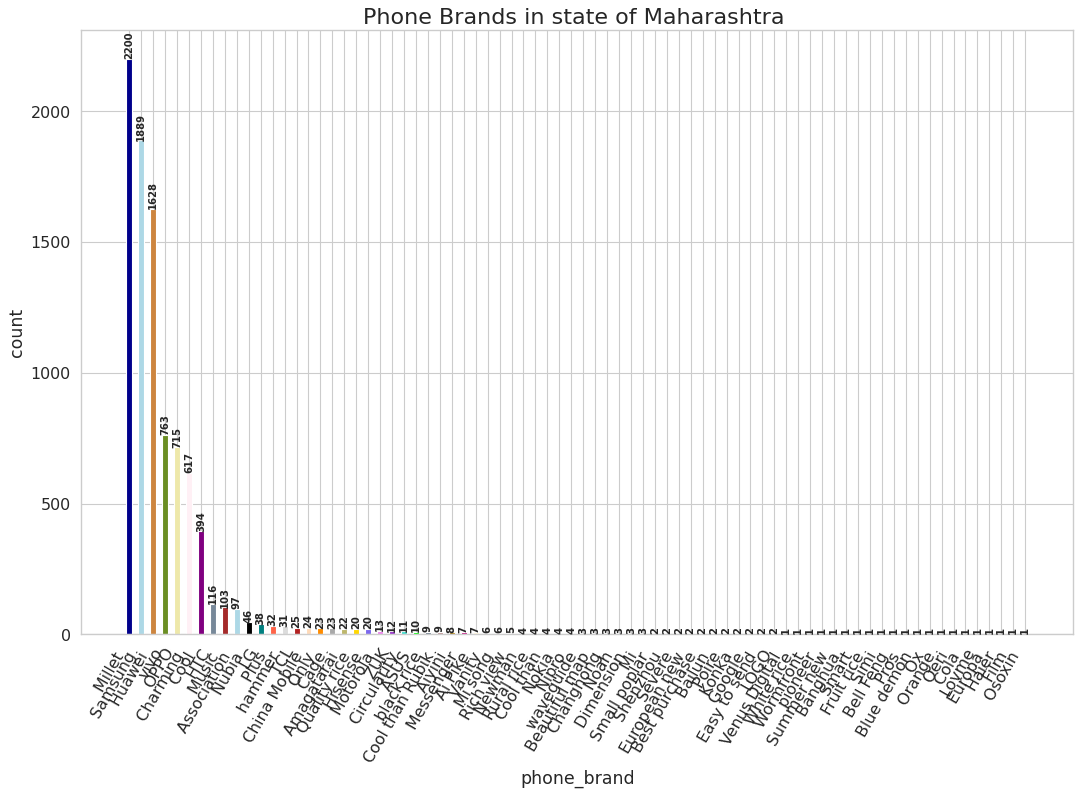

In [80]:
df_Phone=pd.DataFrame(df_State.groupby('phone_brand').agg(Cnt=('phone_brand','count')))
df_Phone['phone_brand']=df_Phone.index
df_Phone.reset_index(drop=True, inplace=True)
df_Phone.sort_values('Cnt',ascending=False, inplace=True)
#print(df_Phone.head(5))
#colours

n = df_Phone['phone_brand'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df_Phone['phone_brand'], df_Phone['Cnt'], color=c, width=.5)
for i, val in enumerate(df_Phone['Cnt'].values):
    plt.text(i, val, int(val), horizontalalignment='center', rotation ='vertical',verticalalignment='bottom', fontdict={'fontweight':600, 'size':9})
# Decoration
plt.gca().set_xticklabels(df_Phone['phone_brand'], rotation=60, horizontalalignment= 'right')
plt.title("Phone Brands in state of Maharashtra ", fontsize=20)
plt.ylabel('count')
plt.xlabel('phone_brand')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()
